In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [74]:
data = pd.read_csv('WHR2024.csv')

In [75]:
data.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [76]:
data_columns = ['Country name', 'Ladder score', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']

In [77]:
data = data[data_columns].copy()

In [78]:
happy_df = data.rename({'Country name': 'country_name', 'Ladder score': 'happiness_score', 'Explained by: Log GDP per capita': 'log_GDP_per_capita', 'Explained by: Social support': 'social_support', 'Explained by: Healthy life expectancy': 'health_life_expectancy', 'Explained by: Freedom to make life choices': 'freedom_to_make_life_choices', 'Explained by: Generosity': 'generosity', 'Explained by: Perceptions of corruption': 'perceptions_of_corruption'}, axis=1)

In [79]:
happy_df.head()

,country_name,happiness_score,log_GDP_per_capita,social_support,health_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [80]:
happy_df = happy_df.dropna()
happy_df.isnull().sum()

country_name                    0
happiness_score                 0
log_GDP_per_capita              0
social_support                  0
health_life_expectancy          0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

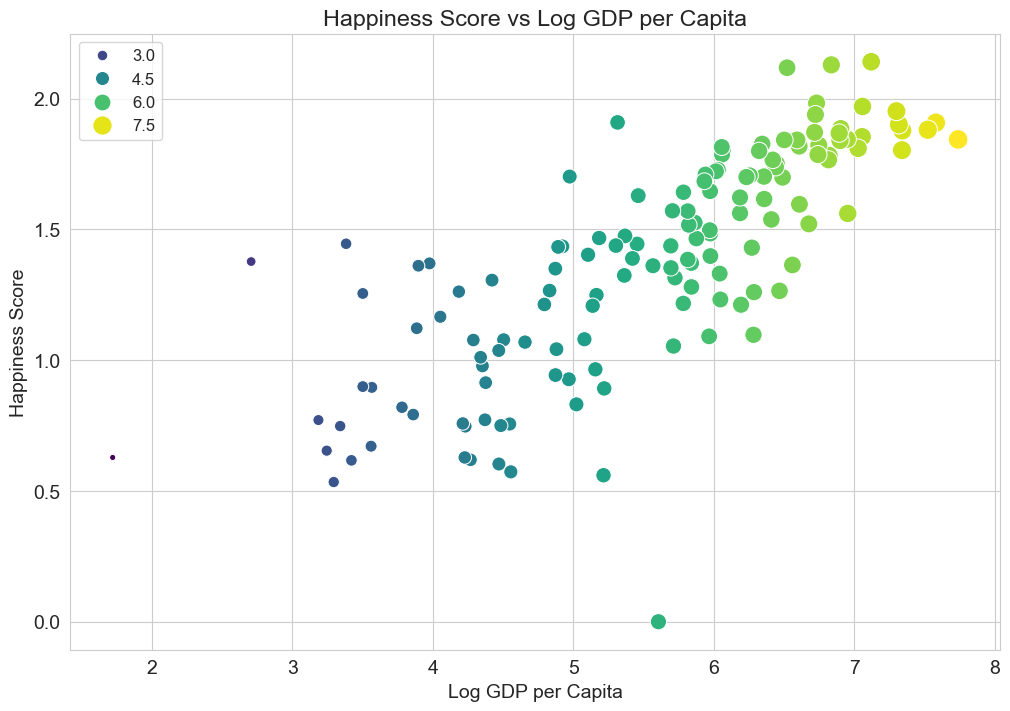

In [81]:
# Plot between happiness score and log GDP per capita
plt.figure(figsize=(12, 8))
sns.scatterplot(data=happy_df, x='happiness_score', y='log_GDP_per_capita', hue='happiness_score', size='happiness_score', sizes=(20, 200), palette='viridis')
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('Happiness Score vs Log GDP per Capita')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [82]:
total_country = happy_df.groupby('country_name').count().reset_index().shape[0]
print(f'Total Countries in the Dataset: {total_country}')

Total Countries in the Dataset: 140


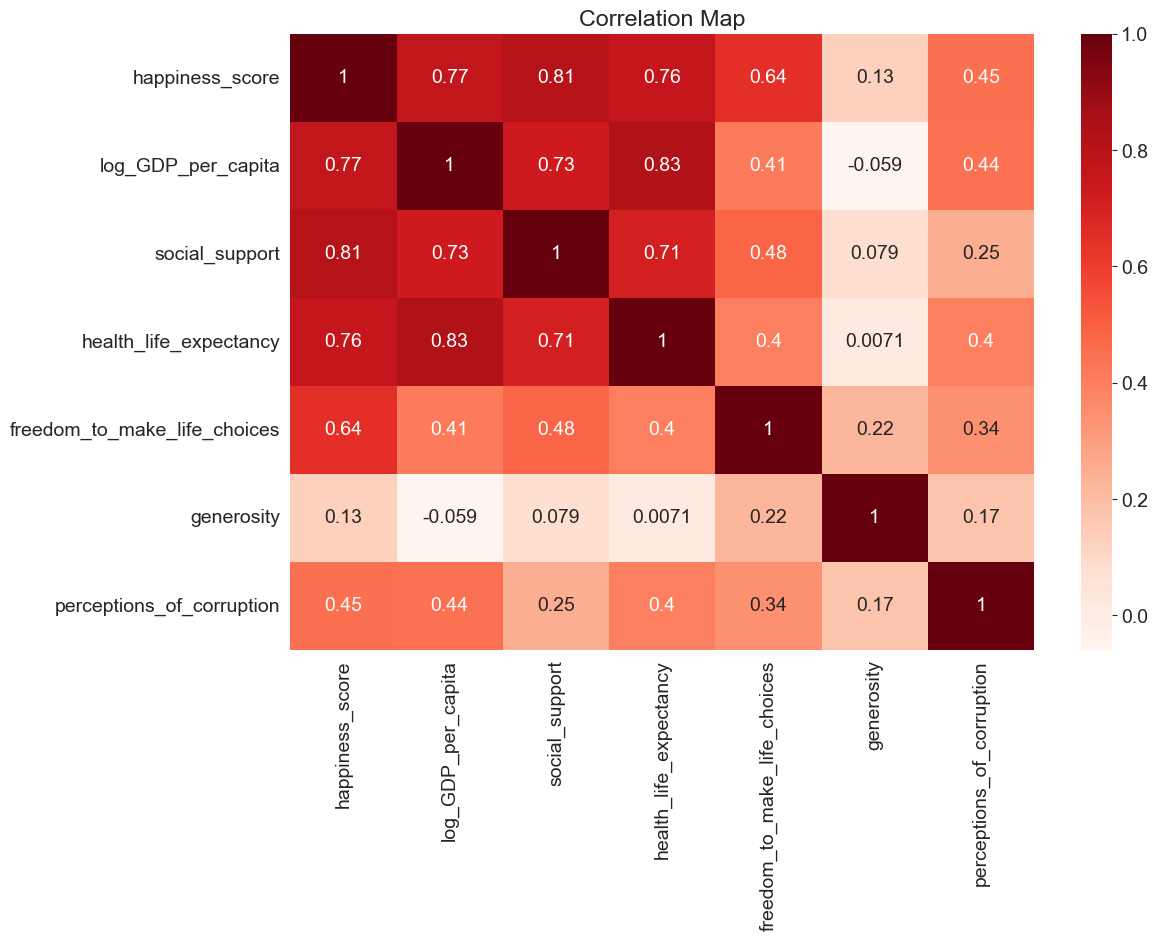

In [83]:
# Correlation Map
cor = happy_df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Map')
plt.show()

In [84]:
# Corruption in Countries
corruption = happy_df.groupby('country_name')['perceptions_of_corruption'].mean().sort_values(ascending=False).reset_index().head(10)
corruption

,country_name,perceptions_of_corruption
0,Singapore,0.575
1,Denmark,0.548
2,Finland,0.546
3,Sweden,0.524
4,Switzerland,0.498
5,Norway,0.484
6,New Zealand,0.480
7,Luxembourg,0.432
8,Ireland,0.418
9,Hong Kong S.A.R. of China,0.402


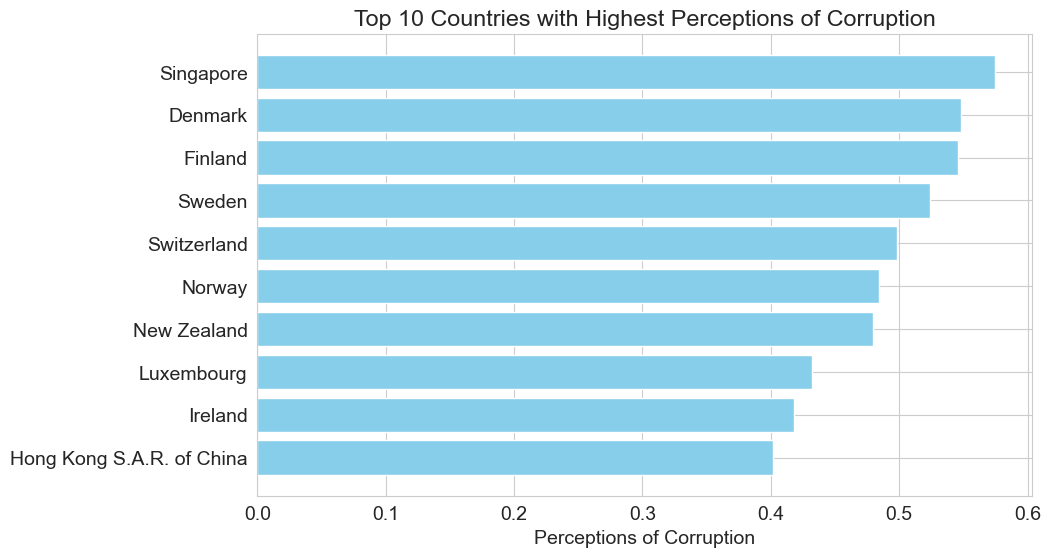

In [85]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.barh(corruption['country_name'], corruption['perceptions_of_corruption'], color='skyblue')
plt.xlabel('Perceptions of Corruption')
plt.title('Top 10 Countries with Highest Perceptions of Corruption')
plt.gca().invert_yaxis()
plt.show()

In [86]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

/var/folders/95/frw3tr_s33z2hcys8_c0z4vh0000gn/T/ipykernel_49908/2336844041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country_name', data=top_10, ax=axes[0], palette='Blues_d')
/var/folders/95/frw3tr_s33z2hcys8_c0z4vh0000gn/T/ipykernel_49908/2336844041.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='happiness_score', y='country_name', data=bottom_10, ax=axes[1], palette='Reds_d')


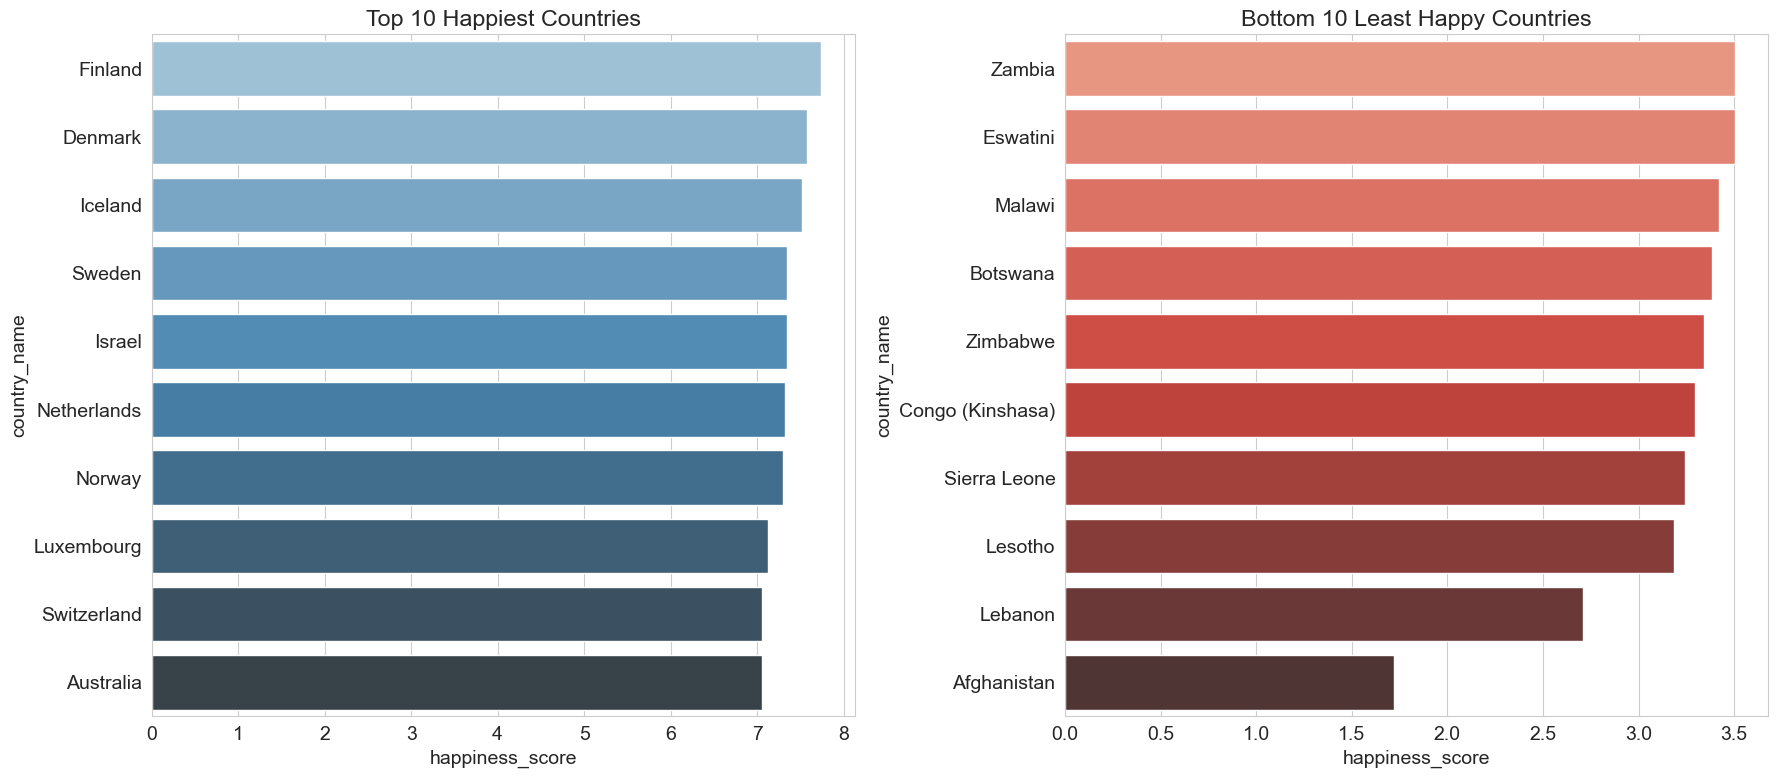

/var/folders/95/frw3tr_s33z2hcys8_c0z4vh0000gn/T/ipykernel_49908/2336844041.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ylabels, y=xlabels, palette='Reds_d')


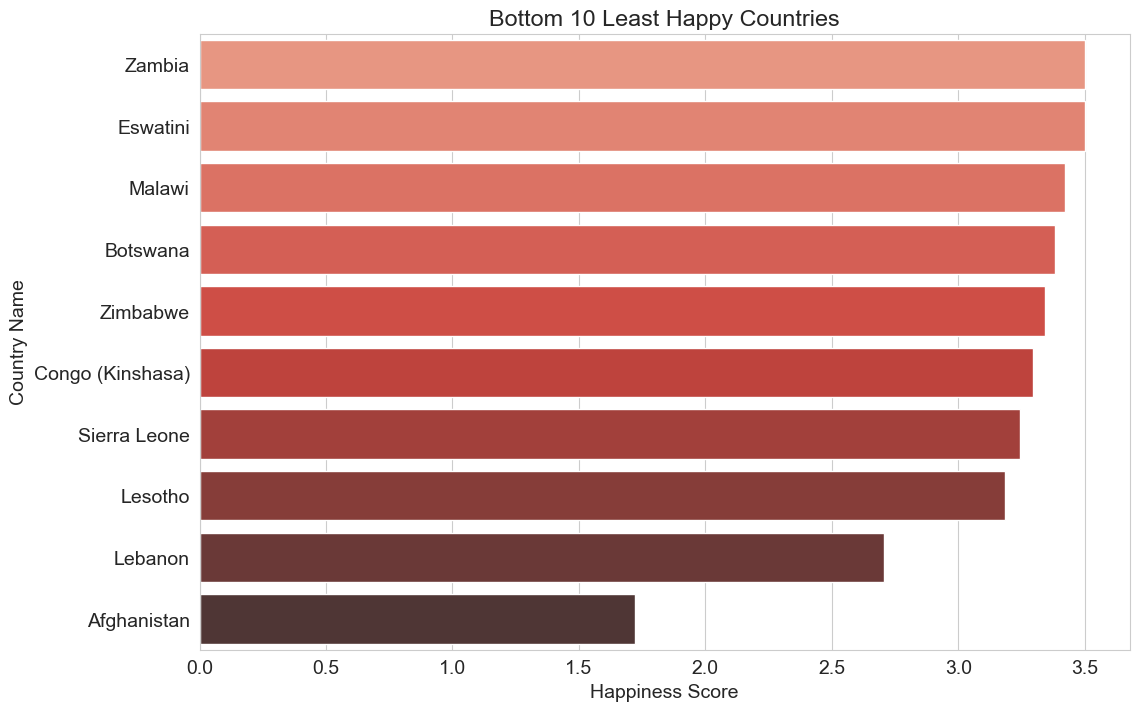

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='happiness_score', y='country_name', data=top_10, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Happiest Countries')
sns.barplot(x='happiness_score', y='country_name', data=bottom_10, ax=axes[1], palette='Reds_d')
axes[1].set_title('Bottom 10 Least Happy Countries')
plt.tight_layout()
plt.show() 

xlabels = bottom_10['country_name']
ylabels = bottom_10['happiness_score'] 
plt.figure(figsize=(12, 8))
sns.barplot(x=ylabels, y=xlabels, palette='Reds_d')
plt.title('Bottom 10 Least Happy Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country Name')
plt.show()


/var/folders/95/frw3tr_s33z2hcys8_c0z4vh0000gn/T/ipykernel_49908/1508368494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='health_life_expectancy', data=top_10, ax=axes[0], palette='Blues_d')
/var/folders/95/frw3tr_s33z2hcys8_c0z4vh0000gn/T/ipykernel_49908/1508368494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_name', y='health_life_expectancy', data=bottom_10, ax=axes[1], palette='Reds_d')


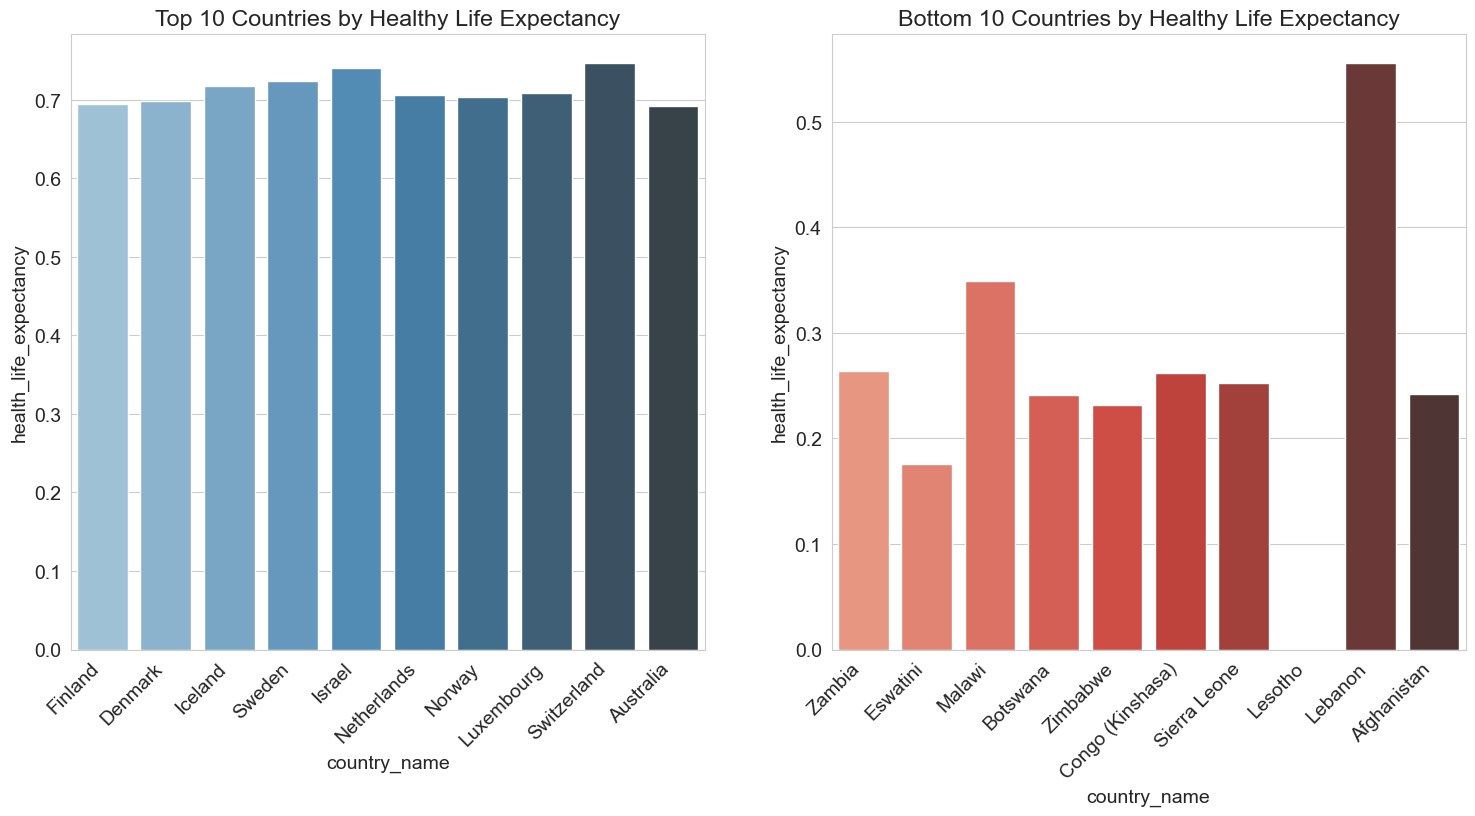

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='country_name', y='health_life_expectancy', data=top_10, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 10 Countries by Healthy Life Expectancy')
sns.barplot(x='country_name', y='health_life_expectancy', data=bottom_10, ax=axes[1], palette='Reds_d')
axes[1].set_title('Bottom 10 Countries by Healthy Life Expectancy')
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
plt.show()  

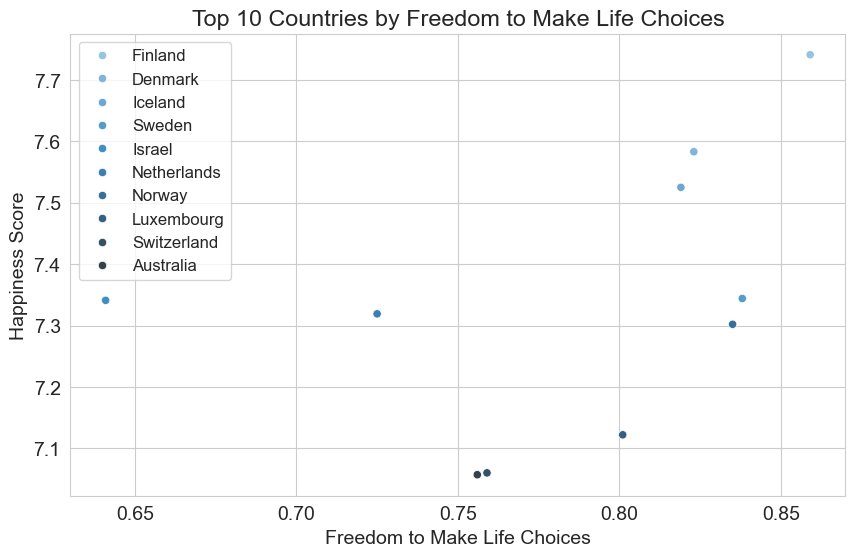

In [92]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(x='freedom_to_make_life_choices', y='happiness_score', hue='country_name', data=top_10, palette='Blues_d')
plt.legend(loc = 'upper left', fontsize = 12)
plt.title('Top 10 Countries by Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()

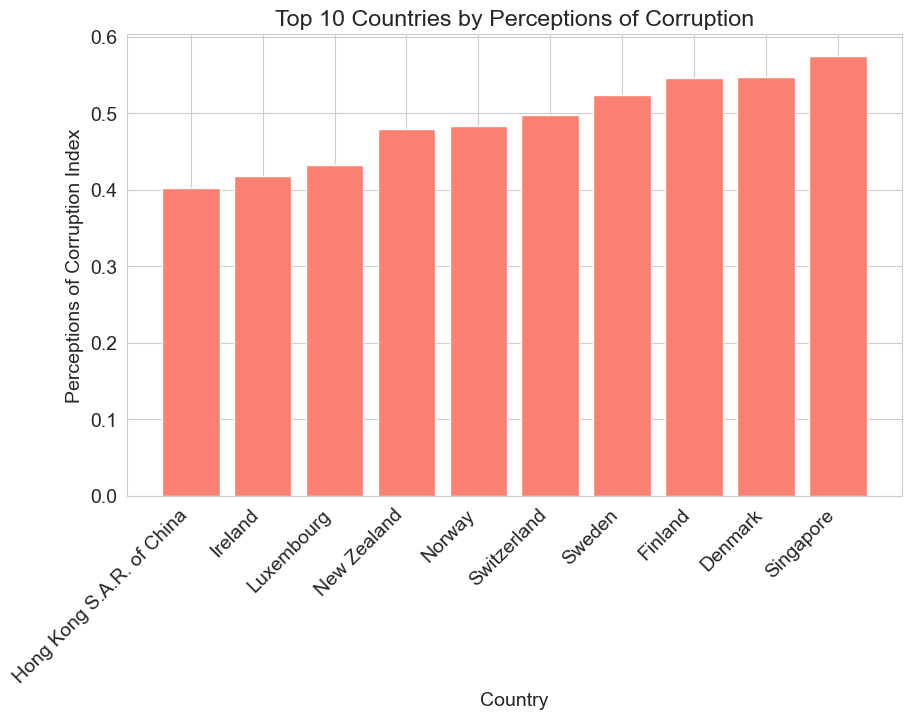

In [98]:
country = happy_df.sort_values(by='perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Top 10 Countries by Perceptions of Corruption')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Perceptions of Corruption Index', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.bar(country['country_name'], country['perceptions_of_corruption'], color='salmon')
plt.show()

/var/folders/95/frw3tr_s33z2hcys8_c0z4vh0000gn/T/ipykernel_49908/2045164051.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='perceptions_of_corruption', y='happiness_score', data=happy_df, palette='viridis', size='happiness_score', sizes=(20, 200))


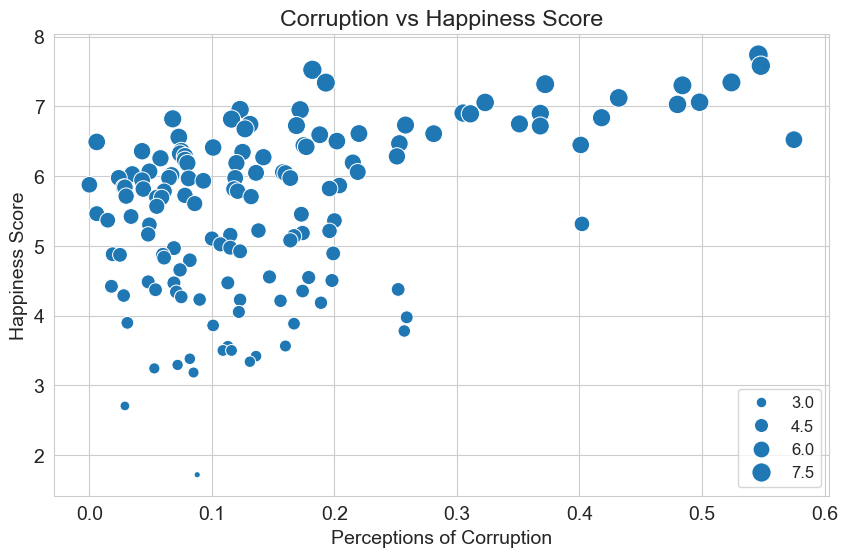

In [102]:
# Corruption vs Happiness Score
plt.rcParams['figure.figsize'] = (10, 6)
sns.scatterplot(x='perceptions_of_corruption', y='happiness_score', data=happy_df, palette='viridis', size='happiness_score', sizes=(20, 200))
plt.legend(loc = 'upper left', fontsize = 12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Corruption vs Happiness Score')
plt.xlabel('Perceptions of Corruption') 
plt.ylabel('Happiness Score')
plt.show()